# Tutorial - Marques-Pita Canalization

The example from the Marques-Pita & Rocha (2013) paper.

In [2]:
%matplotlib inline

In [3]:
import networkx as nx
import pandas as pd
pd.set_option('display.width',200)
import cana
from cana.datasets.bio import MARQUESPITA
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz
import matplotlib.pylab as plt
from IPython.display import Image, display

In [4]:
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0055946.g005",width=350)

## Marques-Pita Network

In [5]:
net = MARQUESPITA()
print(net)

<BNetwork(name='Marques-Pita & Rocha', N=7, Nodes=['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])>


In [13]:
n = MARQUESPITA().nodes[6]
print(n)
print(n.outputs)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))
dfLUT, dfPI, dfTW = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
print(display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TW Schema':dfTW}, axis=1).fillna('-')))

<BNode(id=6, name='Seven', k=6, inputs=[0,1,2,3,4,5], state=0, outputs=[0,0,0,0...0,0,0,0] constant=0)>
['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
k_r: 4.25 - 0.66
k_e: 0.29 - 0.34
r_ji: [0.817708333333333, 0.4270833333333333, 0.4270833333333333, 0.817708333333333, 0.817708333333333, 0.817708333333333] (mean)
e_ji: [0.18229166666666696, 0.5729166666666667, 0.5729166666666667, 0.18229166666666696, 0.18229166666666696, 0.18229166666666696] (mean)


Original LUT      PI Schema        TW Schema     
            In: Out:       In: Out:         In: Out:
0        000000    0    1##111    0      0##000    0
1        000001    0    0##000    0      1##111    0
2        000010    0    #1####    0      #1####    0
3        000011    0    ##0###    0      ##0###    0
4        000100    0    #011#0    1  0̊011̊#̊#̊    1
..          ...  ...       ...  ...         ...  ...
59       111011    0         -    -           -    -
60       111100    0         -    -           -    -
61       111101    0         -    -           -    -
62       111110    0         -    -           -    -
63       111111    0         -    -           -    -

[64 rows x 6 columns]

None


In [15]:
print("Values in this Panel C are not k normalized")
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0055946.g010",width=350)

Values in this Panel C are not k normalized


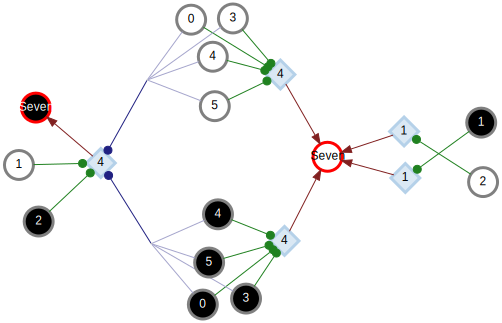

In [12]:
draw_canalizing_map_graphviz(n.canalizing_map())